**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [3]:
FD_RES

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc"

In [4]:
txt_fdiry = file.path(FD_RES, "results", "KS91_K562_ASTARRseq")
dir(txt_fdiry)

[1] "coverage"                           "coverage_astarrseq_peak_macs_input"
[3] "coverage_ccres_v4"                  "fragment"                          
[5] "fragment_count"                     "fragment_nuc"

In [15]:
txt_fdiry = file.path(
    FD_RES, 
    "results", 
    "KS91_K562_ASTARRseq",
    "fragment_count"
)
txt_fname = "KS91_K562_ASTARRseq.Input.rep1.SUBSET.unstranded.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, col_names=FALSE, show_col_types = FALSE)

dat_fragment_import_astarr = dat
print(dim(dat))
head(dat)

[1] 7131114      11


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr11,3999592,4000108,chr11_3999592_4000108,1,.,chr11,4e+06,6600000,chr11:4091884-6505900,108
chr11,3999629,4000121,chr11_3999629_4000121,1,.,chr11,4e+06,6600000,chr11:4091884-6505900,121
chr11,3999670,4000006,chr11_3999670_4000006,1,.,chr11,4e+06,6600000,chr11:4091884-6505900,6
chr11,3999679,4000092,chr11_3999679_4000092,1,.,chr11,4e+06,6600000,chr11:4091884-6505900,92
chr11,3999701,4000025,chr11_3999701_4000025,1,.,chr11,4e+06,6600000,chr11:4091884-6505900,25
chr11,3999737,4000108,chr11_3999737_4000108,1,.,chr11,4e+06,6600000,chr11:4091884-6505900,108


In [44]:
dat = dat_fragment_import_astarr
dat = dat %>% 
    dplyr::select(X7:X10) %>%
    dplyr::mutate_if(is.double, as.integer) %>%
    dplyr::distinct()

vec = c("Chrom", "Start", "End", "Name")
colnames(dat) = vec

dat = dat %>% dplyr::mutate(Length = End-Start)

dat_fragment_range = dat
print(dim(dat))
dat

[1] 16  5


Chrom,Start,End,Name,Length
<chr>,<int>,<int>,<chr>,<int>
chr11,4000000,6600000,chr11:4091884-6505900,2600000
chr11,32800000,35000000,chr11:32869701-34870100,2200000
chr11,61700000,62000000,chr11:61787329-61898348,300000
chr12,54290000,54310000,chr12:54300766-54301042,20000
chr12,110000000,113000000,chr12:110726151-112325737,3000000
chr16,0,1300000,chr16:10001-1173100,1300000
chr19,12880000,12900000,chr19:12887110-12887237,20000
chr2,59000000,62000000,chr2:59553301-61553700,3000000
chr20,55500000,59000000,chr20:56391301-58391700,3500000


In [45]:
dat = dat_fragment_range
sum(dat$Length)

[1] 49077000

In [24]:
dat = dat_fragment_import_astarr
dat = dat %>% 
    dplyr::select(X1:X6) %>%
    dplyr::mutate_if(is.double, as.integer) %>%
    dplyr::distinct()

vec = c("Chrom", "Start", "End", "Name", "Score", "Strand")
colnames(dat) = vec

dat = dat %>% dplyr::mutate(Length = End - Start)

dat_fragment_count = dat
print(dim(dat))
head(dat)

[1] 7131114       7


Chrom,Start,End,Name,Score,Strand,Length
<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
chr11,3999592,4000108,chr11_3999592_4000108,1,.,516
chr11,3999629,4000121,chr11_3999629_4000121,1,.,492
chr11,3999670,4000006,chr11_3999670_4000006,1,.,336
chr11,3999679,4000092,chr11_3999679_4000092,1,.,413
chr11,3999701,4000025,chr11_3999701_4000025,1,.,324
chr11,3999737,4000108,chr11_3999737_4000108,1,.,371


In [27]:
dat = dat_fragment_count

dat = dat %>% 
    dplyr::group_by(Chrom, Start) %>% 
    dplyr::summarise(
        Count_Share = n(), 
        Length_Mean = mean(Length),
        .groups="drop")

dat_summary_shared_start = dat
print(dim(dat))
head(dat)

[1] 4065273       4


Chrom,Start,Count_Share,Length_Mean
<chr>,<int>,<int>,<dbl>
chr11,3999592,1,516
chr11,3999629,1,492
chr11,3999670,1,336
chr11,3999679,1,413
chr11,3999701,1,324
chr11,3999737,1,371


In [28]:
dat = dat_fragment_count

dat = dat %>% 
    dplyr::group_by(Chrom, End) %>% 
    dplyr::summarise(
        Count_Share = n(), 
        Length_Mean = mean(Length),
        .groups="drop")

dat_summary_shared_end = dat
print(dim(dat))
head(dat)

[1] 4066036       4


Chrom,End,Count_Share,Length_Mean
<chr>,<int>,<int>,<dbl>
chr11,4000001,1,126
chr11,4000006,1,336
chr11,4000025,1,324
chr11,4000056,1,315
chr11,4000071,1,105
chr11,4000074,1,199


In [29]:
dat = dat_summary_shared_start
res = table(dat$Count_Share)


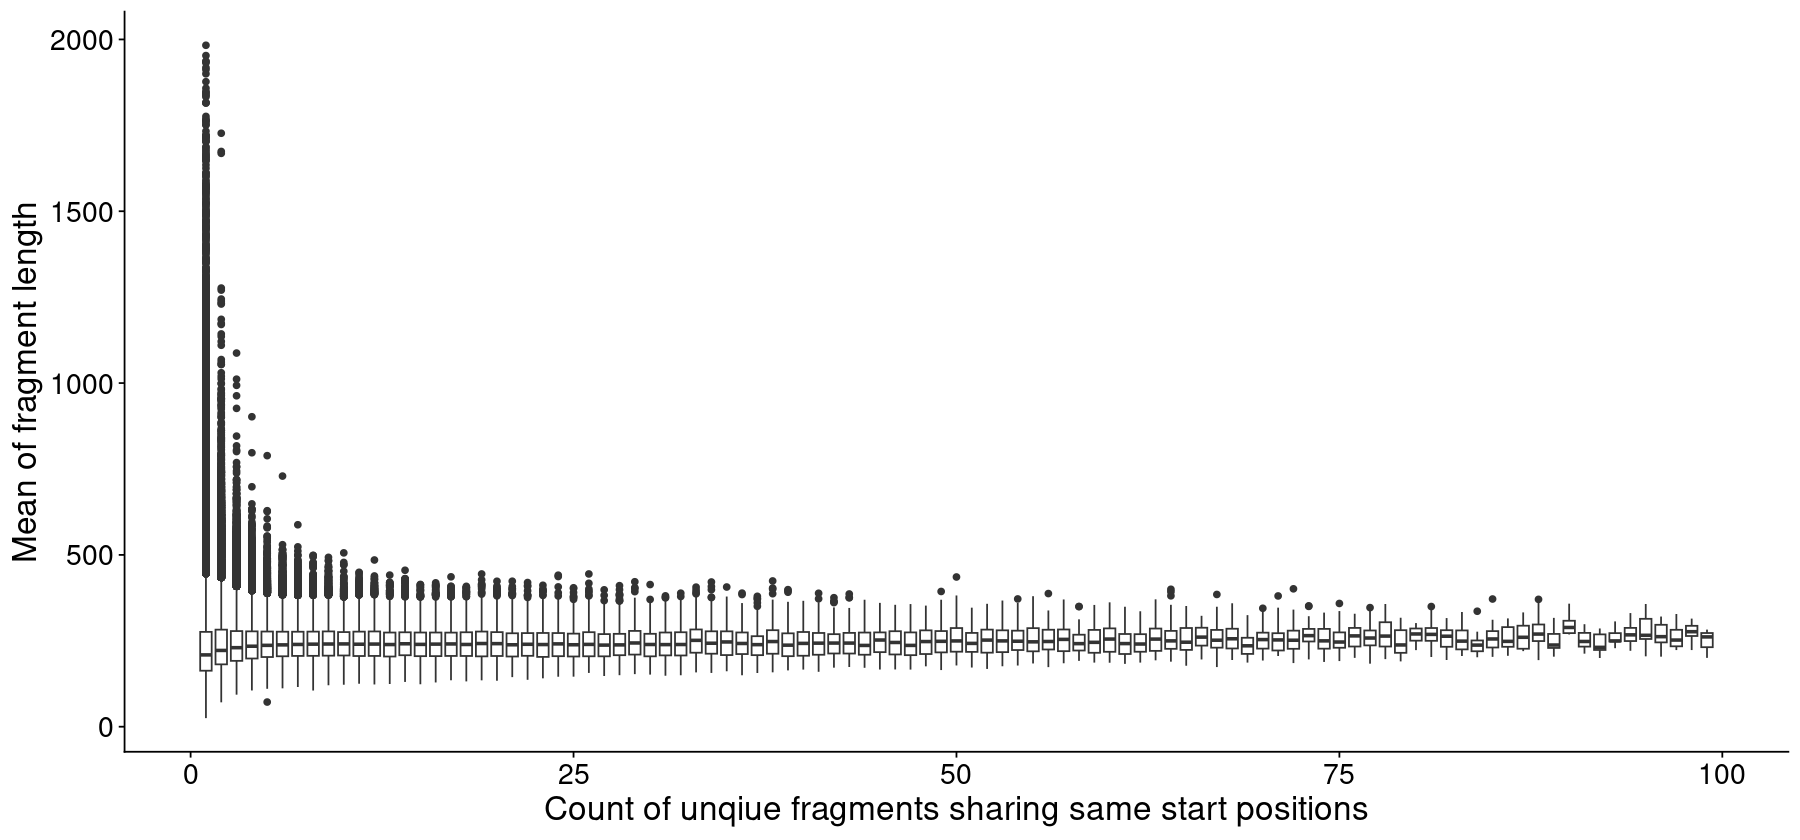

In [40]:
dat = dat_summary_shared_start
dat = dat %>% dplyr::filter(Count_Share < 100)

gpt = ggplot(dat, aes(x=Count_Share, y=Length_Mean, group=Count_Share)) + 
    geom_boxplot() + 
    labs(
        x="Count of unqiue fragments sharing same start positions", 
        y="Mean of fragment length"
    ) +
    theme_cowplot() +
    theme(
        axis.title = element_text(size=20),
        axis.text  = element_text(size=17))

gpt1 = gpt
options(repr.plot.width=15, repr.plot.height=7)
print(gpt)

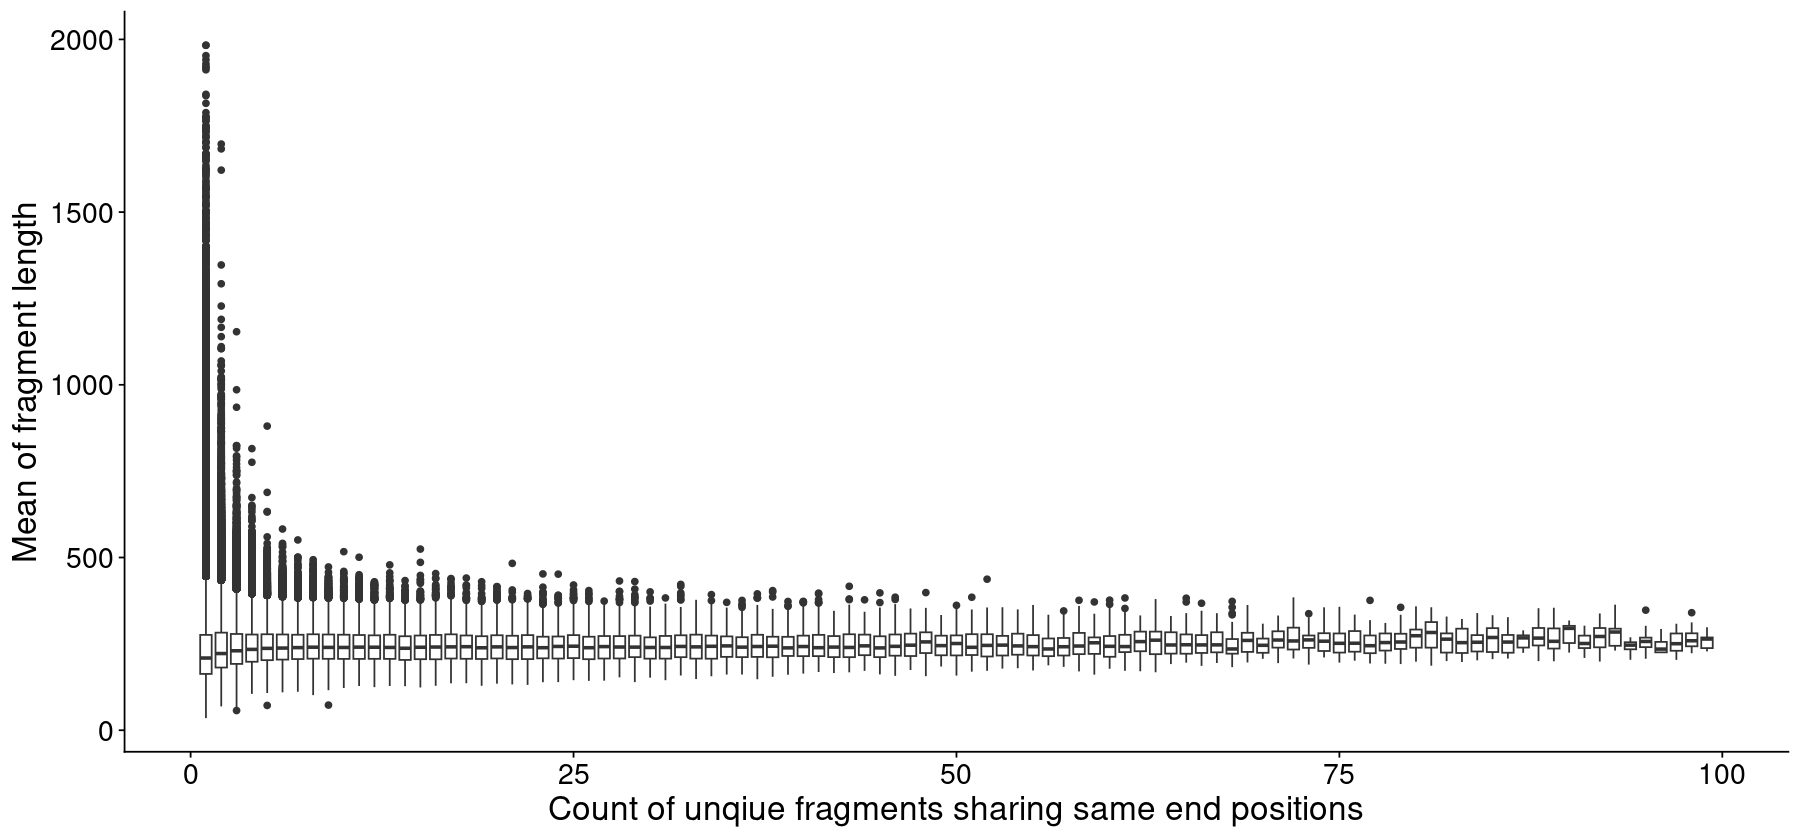

In [41]:
dat = dat_summary_shared_end
dat = dat %>% dplyr::filter(Count_Share < 100)

gpt = ggplot(dat, aes(x=Count_Share, y=Length_Mean, group=Count_Share)) + 
    geom_boxplot() + 
    labs(
        x="Count of unqiue fragments sharing same end positions", 
        y="Mean of fragment length"
    ) +
    theme_cowplot() +
    theme(
        axis.title = element_text(size=20),
        axis.text  = element_text(size=17))

gpt2 = gpt
options(repr.plot.width=15, repr.plot.height=7)
print(gpt)

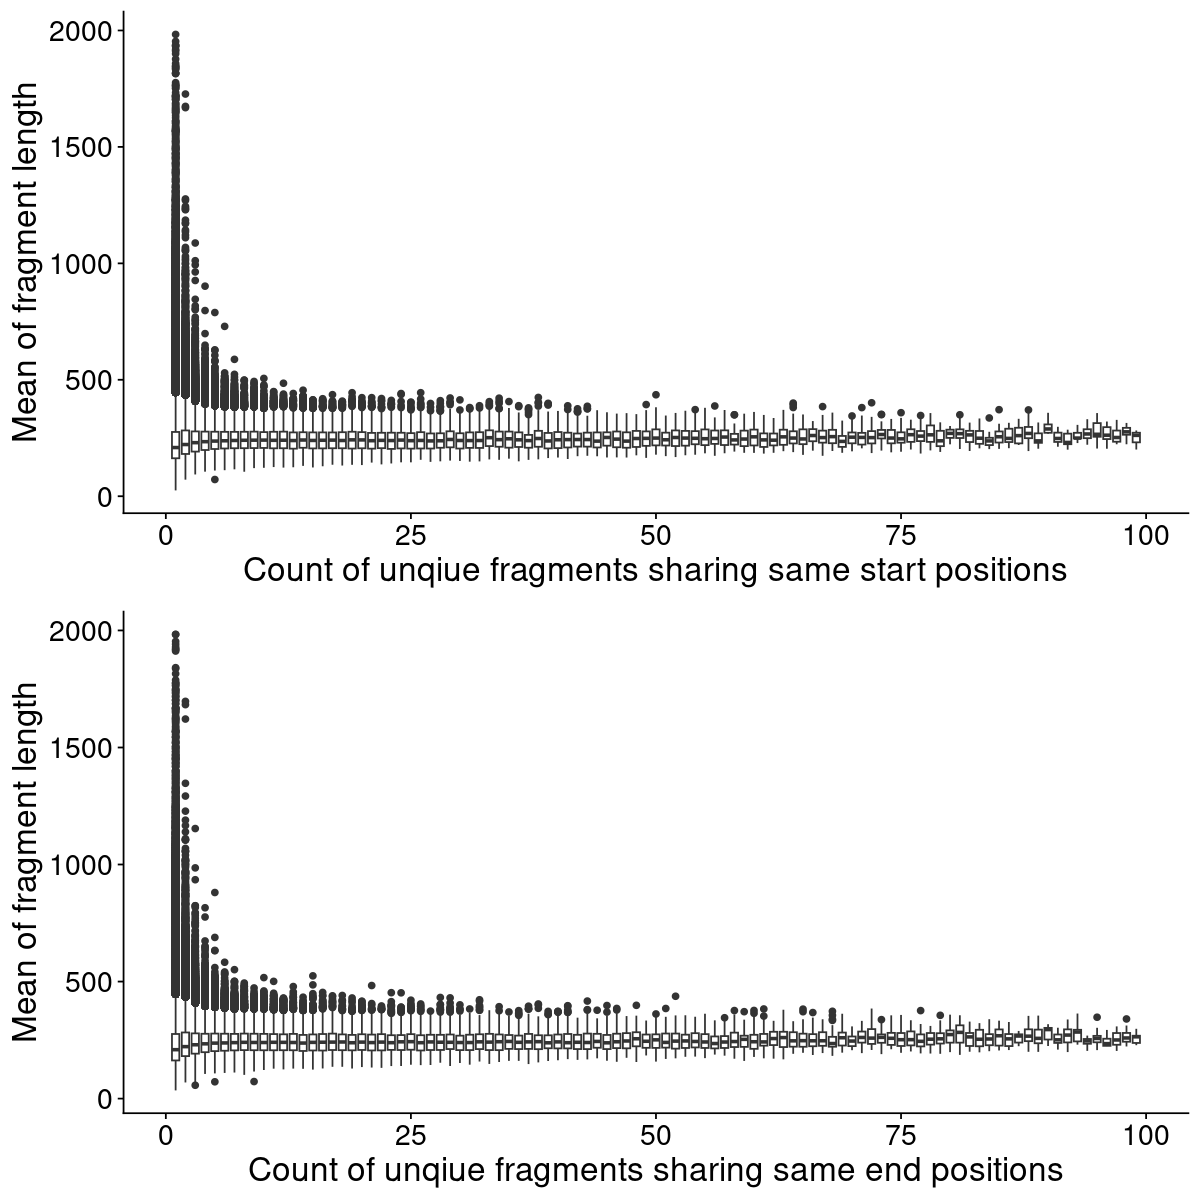

In [43]:
options(repr.plot.width=10, repr.plot.height=10)
plot_grid(gpt1, gpt2, ncol = 1)